# Supervised LearningActivity: Building a Student Intervention System

## Question 1 - Classification vs. Regression
Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?

Here, we have to check whether the students may pass or fail in the exam . So we have two option i.e, 
case-1  pass
case-2 fail
Finally what we are doing is just categorisation , so it is a classification problem

## Question-2. Load necessary Python libraries and load the student data. Note that the last column from this dataset, 'passed', will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [10]:
data=pd.read_csv(r"C:\Users\saheer\Downloads\student-data.csv")
data.head

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


## Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:

      1.The total number of students, n_students.
      2.The total number of features for each student, n_features.
      3.The number of those students who passed, n_passed.
      4.The number of those students who failed, n_failed.
      5.The graduation rate of the class, grad_rate, in percent (%).

In [15]:
# Calculating total number of students
n_students = data.shape[0]

In [16]:
n_students

395

In [17]:
data.shape

(395, 31)

In [18]:
## calculating no of features
n_features = len(data.columns)

In [19]:
n_features## here we get 31 fetures including our target variable.

31

In [20]:
##calculating passing students
n_passed = len(data[data.passed=='yes'])

In [21]:
n_passed## 265 students passed the exam

265

In [22]:
## calculating the failing students.
n_failed = len(data[data.passed=='no'])

In [23]:
n_failed

130

In [24]:
# Calculating the graduation rate
grad_rate = (n_passed)/(n_students)*100

In [25]:
grad_rate

67.08860759493672

In [26]:
## using float 
grad_rate = float(n_passed)/float(n_students)*100
grad_rate

67.08860759493672

## Preparing the Data
you will prepare the data for modeling, training and testing.

## Question-4 Identify feature and target columns
separate the student data into feature and target columns to see if any features are non-numeric.

In [27]:
# Extract feature columns
feat_cols= data.drop(['passed'],axis=1)
feat_cols.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [28]:
feat_cols.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [29]:
## target column 'passed'
target =data['passed']
target.value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [30]:
data.isna().sum()## cheching for null values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [31]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [48]:
# Separate the data into feature data and target data (X and y, respectively)
x=data.drop(['passed'],axis=1)## data splitting
y =data['passed']

## Question-5 Preprocess Feature Columns
As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. internet. These can be reasonably converted into 1/0 (binary) values.

Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section

In [57]:
X=pd.get_dummies(x)
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [58]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


## Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all categorical features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:

Randomly shuffle and split the data (X, y) into training and testing subsets.
Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
Set a random_state for the function(s) you use, if provided.
Store the results in X_train, X_test, y_train, and y_test.

In [59]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=95)

In [60]:
# Show the results of the split
print(" shape of x train",x_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",x_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (300, 30)
 shape of y train (300,)
 shape of x test (95, 30)
 shape of y test (95,)


## Question - 7 Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

#explanation

# 1.Logistic Regression

Advantages

*Logistic regression is easier to implement, interpret, and very efficient to train

*It makes no assumptions about distributions of classes in feature space

*It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.

Disadvantages

*If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.

*It constructs linear boundaries.

*The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

# 2.Random Forest Method

Advantages

*It reduces overfitting in decision trees and helps to improve the accuracy

*It is flexible to both classification and regression problems

*It works well with both categorical and continuous values

Disadvantages

*It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 

*It also requires much time for training as it combines a lot of decision trees to determine the class.

*Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

# 3.K-NN Model

Advantages

*K-NN algoritham do not need training period

*Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

*KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function

Disadvantages

*Does not work well with large dataset

*Does not work well with high dimensions

*Sensitive to noisy data, missing values and outliers

# Importing the three supervised learning models from sklearn

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting model-1  on traning data 

In [61]:
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)

C:\Users\saheer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# predicting on the test data 

In [62]:
y_pred=logit_model.predict(X_test)

In [63]:
y_pred

array(['no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
      dtype=object)

# calculating the accuracy score

In [64]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.7157894736842105


# Fitting the model-2 on traning data and predict on the test data and measure the accuracy

# 2.Random Forest Method

In [65]:
randomfor=RandomForestClassifier()
randomfor.fit(X_train,y_train)
y_pred=randomfor.predict(X_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.6736842105263158


# Fitting the model-3 on traning data and predict on the test data and measure the accuracy

# 3.K-NN Method

Text(0, 0.5, 'accuracy')

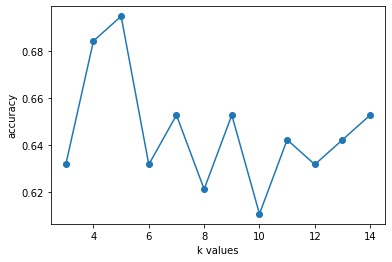

In [79]:
model2=KNeighborsClassifier()
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('k values')
plt.ylabel("accuracy")  

In [80]:
model2=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print("Accuracy score of model2(KNN) : ",accuracy_score(y_test,y_pred))

Accuracy score of model2(KNN) :  0.6842105263157895


In [ ]:
So from the above three models we can say that logistic regression gives better results than the other two